In [1]:
%pylab inline
import numpy as np
import os
import pylab as plt
import scipy.optimize as fit
import scipy.signal as signal
import statsmodels.api as sm
from mpl_toolkits import mplot3d
import itertools
from analyser import calculate_stat_corr, calculate_spattemp_corr
import time

Populating the interactive namespace from numpy and matplotlib


*N
*L
*startingTime
*maxTime
*timeDelay
*pFolder
*kValues
*k
*timeLength

# Creating correlations
## Static correlations

3200
Working on N32, L3.5
[1.34025701 1.75687105 2.61019216] [1.34274587 1.7622823  2.62219753]


D:\DevelopiNation\thesis\vicsek_timedelay\correlation.py:314: RuntimeWarning: invalid value encountered in true_divide
  checkZero = np.where(krTensor>0, np.sin(krTensor)/krTensor, 1)


[1.38076492 1.76710724 2.62854886] [1.38676958 1.77199298 2.64382196]
[1.41166468 1.7781515  2.68285843] [1.40864237 1.77489686 2.68869008]
[1.40515323 1.76999972 2.72968479] [1.39705112 1.77836083 2.73720445]
[1.3875647  1.76401451 2.79306297] [1.38472989 1.77794792 2.78566079]
[1.40971089 1.76263053 2.81239724] [1.40881111 1.76265676 2.82672507]
[1.41705738 1.80848708 2.83754133] [1.41439047 1.804361   2.8537367 ]
[1.45816519 1.76316126 2.86437512] [1.45061702 1.77624748 2.87366827]
[1.47795723 1.73891306 2.89212339] [1.47973459 1.74485436 2.89948763]
[1.4951063  1.70746079 2.9272985 ] [1.48468663 1.7097202  2.93471643]
[1.48115034 1.65784081 2.90036802] [1.47766528 1.67043955 2.90458785]
[1.44984575 1.62122139 2.92196461] [1.44916593 1.63444418 2.92438988]
[1.42138832 1.6265165  2.95628164] [1.42099459 1.6382088  2.96552628]
[1.43920358 1.57916343 2.96370869] [1.43600707 1.59051577 2.96554475]
[1.42618386 1.59484042 2.92502193] [1.4075899  1.60056218 2.92565071]
[1.41706972 1.605978

[1.25637977 3.69449984 1.45501401] [1.23641596 3.68425188 1.45525015]
[1.29979156 3.7115232  1.43068782] [1.27498936 3.70524695 1.43134828]
[1.31001678 3.7117353  1.40345479] [1.30741986 3.69055252 1.39624362]
[1.30597846 3.68646291 1.37237198] [1.28724541 3.66791025 1.3564904 ]
[1.24836538 3.67030772 1.35014775] [1.24434513 3.65675851 1.33335592]
[1.22585781 3.62895994 1.38976923] [1.23286171 3.61557942 1.35928686]
[1.23091305 3.58924437 1.3864999 ] [1.24267914 3.5671447  1.36688265]
[1.27835295 3.61355847 1.38955403] [1.27634666 3.601514   1.38049329]
[1.30153602 3.56950662 1.39255495] [1.3084045  3.56318641 1.38230731]
[1.3035895  3.55351521 1.34645   ] [1.30000985 3.55191788 1.33432241]
[1.29198126 3.55835035 1.29846478] [1.29748646 3.56060892 1.28514825]
[1.30208658 3.51984716 1.28218282] [1.31668414 3.51853597 1.26613995]
[1.32959214 3.49620595 1.24140999] [1.3383751  3.48699361 1.23397504]
[1.32066702 3.45874642 1.21214693] [1.32603656 3.45369305 1.19877797]
[1.31159294 3.429152

KeyboardInterrupt: 

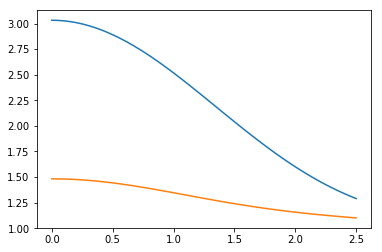

In [2]:
N = [32]
L = []
L.append(np.arange(3.5, 4.5+0.1, 0.1))
dt = 1
startingTime = 19900
maxTime = 20000
kValues = np.linspace(0, 2.5, num=50)
particlesFolder = '1delay'



def run_for_n(n, L, save=False):
    
    timestr = time.strftime("%Y%m%d-%H%M%S")
    susciesFname = 'N{0}_dt{1}_{2}.txt'.format(n, dt, timestr)
    susciesFpath = os.path.join( 'suscies', particlesFolder, susciesFname )
    suscies = np.zeros( (len(L), 4) )
    
    with open(susciesFpath, 'a+') as f:
        if save:
            f.write('# x(nearest neigh), L(box size), suscept, k_max\n')
        for i, l in enumerate(L):
            statCorr, x = calculate_stat_corr(n, l, dt, startingTime, maxTime, kValues, particlesFolder)
            suscies[i] = np.array([ x, l, np.max(statCorr), kValues[np.argmax(statCorr)] ])
            if save:
                np.savetxt(f, suscies[i].reshape(1, suscies[i].shape[0]) )

            plt.plot(kValues, statCorr)
        plt.show()

    plt.plot( suscies[:, 0], suscies[:, 2] )
    plt.show()
    plt.plot( L, suscies[:, 2] )
    plt.show()
    print(suscies[np.argmax(suscies[:, 2])])
    
for i, n in enumerate(N):
    run_for_n(n, L[i])

## Spatio-temporal correlations

In [ ]:
Ns = [256]
Ls = [7.4]
ks = [0.96938776]
#Ns = [32]#, 64, 128, 256, 256]
#Ls = [4.3]#, 4.8, 5.8, 6.7, 7.2]
#ks = [1.836734693877551]#, 1.4318181818181817, 1.1734693877551021, 1.0714285714285714, 1.0204081632653061]
td = 1
startingTime = 10000
maxTime = 20000
timeLength = 300
spattempFolder = '1delay'
coarseGrain = 2
save = True

for i in range(len(Ns)):
    n = Ns[i]
    l = Ls[i]
    k = ks[i]
    
    timestr = time.strftime("%Y%m%d-%H%M%S")
    spattempFname = 'N{0}_L{1}_k{2:.3f}_td{3}_tl{4}_grain{6}_{5}.txt'.format(n, l, k, td, timeLength, timestr, coarseGrain)
    spattempFpath = os.path.join('spattemps', spattempFolder, spattempFname)
    
    spattemp = calculate_spattemp_corr(n, l, td, startingTime, maxTime, timeLength, k, spattempFolder, grain=coarseGrain)
    plt.plot(spattemp[:, 0], spattemp[:, 1])
    plt.show()
    
    if(save):
        f = open(spattempFpath, 'a+')
        np.savetxt(f, spattemp)
        f.close()

2560000
Reached t = 0 / 300 in 0.000s
9998
Reached t = 2 / 300 in 151.240s
9996
Reached t = 4 / 300 in 113.616s
9994
Reached t = 6 / 300 in 115.732s
9992
Reached t = 8 / 300 in 116.178s
9990
Reached t = 10 / 300 in 108.953s
9988
Reached t = 12 / 300 in 118.166s
9986
Reached t = 14 / 300 in 110.504s
9984
Reached t = 16 / 300 in 119.538s
9982
Reached t = 18 / 300 in 124.420s
9980
Reached t = 20 / 300 in 123.357s
9978
Reached t = 22 / 300 in 120.856s
9976
Reached t = 24 / 300 in 117.647s
9974
Reached t = 26 / 300 in 121.912s
9972
Reached t = 28 / 300 in 129.345s


# Loading correlations
## Static correlations

In [6]:
N = [32, 64, 128, 256]
folder = '1delay'
suscies = []

for n in N:
    filesDir = os.path.join('suscies', folder)
    for file in os.listdir(filesDir):
        if file.startswith('N{}'.format(n)):
            print(file)
            suscies.append(np.genfromtxt(os.path.join(filesDir, file)))

N32_dt1.txt
N64_dt1.txt
N128_dt1.txt
N256_dt1.txt


## Spatio-temporal correlations

N32_L4.3_k1.837_td1_tl300_grain2_20190405-182755.txt
N64_L4.8_k1.582_td1_tl300_grain2_20190405-190142.txt
N128_L5.9_k1.224_td1_tl300_grain2_20190405-194650.txt


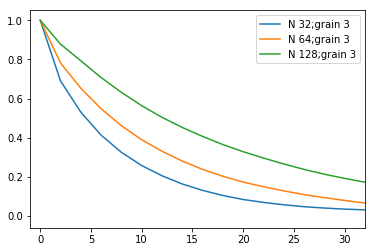

In [47]:
N = [32, 64, 128]
L = [4.3, 4.8, 5.9]
folder = '1delay'
grain = 2
spattemp = []
times = []

filesDir = os.path.join('spattemps', folder)
for n, l in zip(N, L):
    for file in os.listdir(filesDir):
        if file.startswith('N{}_L{}'.format(n, l)) and 'grain{}'.format(grain) in file:
            print(file)
            sptm = np.genfromtxt(os.path.join(filesDir, file))
            spattemp.append(sptm[:, 1])
            times.append(sptm[:, 0])
            plt.plot(sptm[:, 0], sptm[:, 1], label='N {};grain {}'.format(n, gr))

plt.xlim(-1, 32)
plt.legend()
#plt.ylim(-0.1, 1.1)

# Analysing correlations
## Static correlations

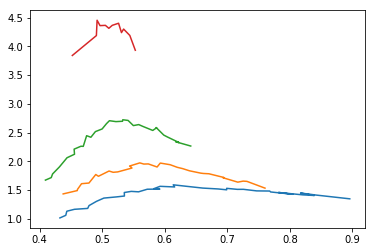

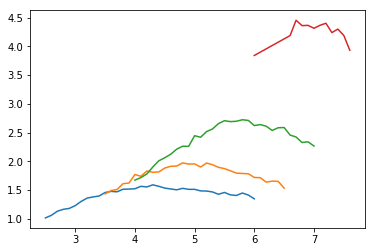

In [7]:
for susc in suscies:
    plt.plot(susc[:, 0], susc[:, 2])
plt.show()

for susc in suscies:
    plt.plot(susc[:, 1], susc[:, 2])
plt.show()

In [29]:
def line(x, a, b):
    return a*x + b

def line2(x, a, b, c):
    return (a)*x[0] + (b)*x[1] + c

N = [32, 64, 128, 256]
maxima = np.zeros( (len(N), 4) )
for i, susc in enumerate(suscies):
    maxima[i] = ( susc[ np.argmax( susc[:, 2] ) ] )
    
# optimise max value by hand...:
#maxima[3] = suscies[3][7]
#maxima[1] = suscies[1][17]
    
popt, pcov = fit.curve_fit( line, np.log(maxima[:, 1]), np.log(maxima[:, 2]) )
popt2, pcov2 = fit.curve_fit( line2, [np.log(N), np.log(maxima[:, 0])], np.log(maxima[:, 2]) )
    
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot( np.log( maxima[:, 1] ), np.log( maxima[:, 2] ), 'o' )
ax1.plot( np.log( maxima[:, 1] ), line( np.log( maxima[:, 1] ), *popt ) )
ax1.set_title('{:.3f}'.format(popt[0]))
ax1.set_xlabel('ln(L)')
ax2.plot( np.log( N*maxima[:, 0] ), np.log( maxima[:, 2] ), 'o' )
ax2.plot( np.log( N*maxima[:, 0] ), line2( [np.log(N), np.log(maxima[:, 0])], *popt2 ) )
ax2.set_title('{:.3f}'.format(popt2[0]*3))
ax2.set_xlabel('ln(N*r1)')
plt.show()

for maximum in maxima:
    print('Using maximum at L={:.1f} and k={}'.format( maximum[1], maximum[3] ) )

NameError: name 'suscies' is not defined

## Spatio-temporal correlations

[8.793867319111188, 12.488275132461917, 19.84883025991707]
[7.642365294835152, 11.424006920880238, 18.17676833418947]


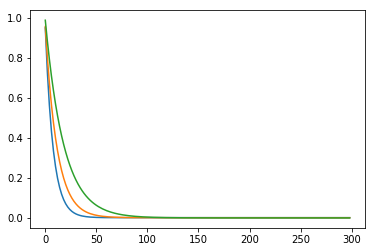

1.9864911415371818 -3.402596689509429
[0.01977046 0.0040915 ]
2.1021096693672523 -3.345695086247426
[0.0527198  0.01091037]


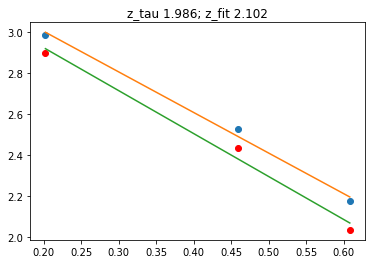

In [48]:
ks = [1.83673469, 1.58163265, 1.2244898]

def line(x, a, b):
    return a*x + b

def func(tau, time, C):
    C = C[1:]
    time = time[1:]
    return  ( 1/tau + np.sum(1/(time)*np.sin(time/tau)*C) ) - np.pi/4 / grain

def exp(time, tau, a, b):
    return a + b*np.exp(-1/tau*time)

taus = []
tausFit = []

for t, sptm in zip(times, spattemp):
    tau = fit.root( func, 3., args=(t, sptm) )
    popt, pcov = fit.curve_fit(exp, t, sptm)
    plt.plot( t, exp(t, *popt) )
    taus.append( tau.x[0] )
    tausFit.append( popt[0] )
print(taus)
print(tausFit)
plt.show()

popt, pcov = fit.curve_fit(line, np.log(ks), np.log(taus))
popt2, pcov2 = fit.curve_fit(line, np.log(ks), np.log(tausFit))
print(*-popt)
print(np.diag(pcov))
print(*-popt2)
print(np.diag(pcov2))

z = -popt[0]
z2 = -popt2[0]

plt.title('z_tau {:.3f}; z_fit {:.3f}'.format(z, z2))
plt.plot(np.log(ks), np.log(taus), 'o')
plt.plot(np.log(ks), line(np.log(ks), *popt))
plt.plot(np.log(ks), np.log(tausFit), 'ro')
plt.plot(np.log(ks), line(np.log(ks), *popt2))
plt.show()

(-1, 80)

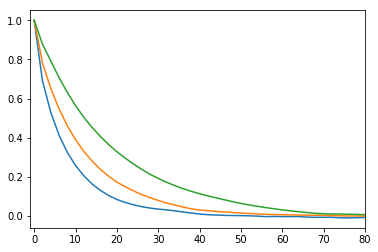

In [49]:
for t, spttmp in zip(times, spattemp):
    plt.plot(t, spttmp)
    
plt.xlim(-1, 80)
#plt.ylim(-0.1, 1.1)

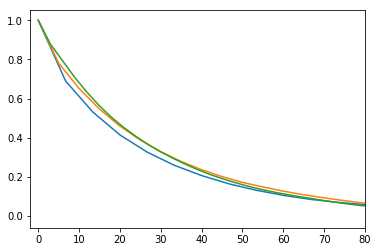

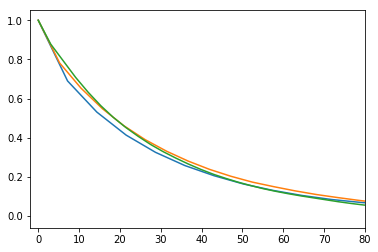

In [50]:
for k, t, spttmp in zip(ks, times, spattemp):
    plt.plot(t*k**z, spttmp)
plt.xlim(-2, 80)
plt.show()
for k, t, spttmp in zip(ks, times, spattemp):
    plt.plot(t*k**z2, spttmp)
plt.xlim(-2, 80)
plt.show()